In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

```py
def draw_plot():
    # Read data from file

    # Create scatter plot

    # Create first line of best fit

    # Create second line of best fit

    # Add labels and title

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()
```

In [2]:
# Read data from file
df = pd.read_csv('./epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [3]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

res =  linregress(x, y)

In [4]:
res.intercept

-119.06594196773983

In [5]:
res.slope

0.06304458401213482

In [6]:
predicted_value = res.intercept + res.slope * 2050
predicted_value

10.175455257136548

In [7]:
x_extrapolated = x.copy()
x_extrapolated = pd.concat([x_extrapolated, pd.Series([2050])], ignore_index=True)
x_extrapolated

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
130    2010
131    2011
132    2012
133    2013
134    2050
Length: 135, dtype: int64

In [8]:
y_extrapolated = y.copy()
y_extrapolated = pd.concat([y_extrapolated, pd.Series([predicted_value])], ignore_index=True)
y_extrapolated

0       0.000000
1       0.220472
2      -0.440945
3      -0.232283
4       0.590551
         ...    
130     8.901575
131     8.964567
132     9.326772
133     8.980315
134    10.175455
Length: 135, dtype: float64

In [9]:
df.iloc[-14:]

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [10]:
x2 = df['Year'].iloc[-14:]
y2 = df['CSIRO Adjusted Sea Level'].iloc[-14:]

res2 =  linregress(x2, y2)

In [11]:
predicted_value_2 = res2.intercept + res2.slope * 2050
predicted_value_2

15.382443524364874

In [12]:
x2_extrapolated = x2.copy()
x2_extrapolated = pd.concat([x2_extrapolated, pd.Series([2050])], ignore_index=True)
x2_extrapolated

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2050
dtype: int64

In [13]:
y2_extrapolated = y2.copy()
y2_extrapolated = pd.concat([y2_extrapolated, pd.Series([predicted_value_2])], ignore_index=True)
y2_extrapolated

0      7.062992
1      7.287402
2      7.381890
3      7.759843
4      7.740157
5      7.744094
6      7.917323
7      7.996063
8      8.350394
9      8.586614
10     8.901575
11     8.964567
12     9.326772
13     8.980315
14    15.382444
dtype: float64

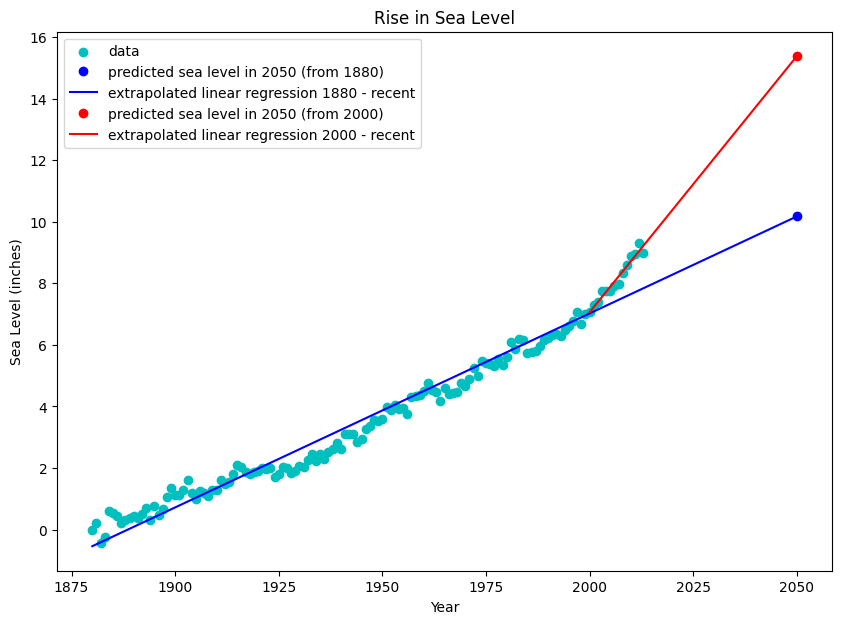

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x, y, color='c', label='data')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.plot(2050, predicted_value, 'bo', label='predicted sea level in 2050 (from 1880)')
plt.plot(x_extrapolated, res.intercept + res.slope*x_extrapolated, color='b', label=f'extrapolated linear regression 1880 - recent')

plt.plot(2050, predicted_value_2, 'ro', label='predicted sea level in 2050 (from 2000)')
plt.plot(x2_extrapolated, res2.intercept + res2.slope*x2_extrapolated, color='r', label=f'extrapolated linear regression 2000 - recent')

plt.legend()

In [15]:
# die Vorgehensweise ist zwar wissenschaftlich korrekt aber der code ist kacke und umständlich 😩
# fig.savefig('plot.png')

-----------------

-----------------

In [37]:
new_x = np.arange(2014,2051)
new_x

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
       2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
       2047, 2048, 2049, 2050])

In [38]:
predicted_y = res.slope * new_x + res.intercept
predicted_y

array([ 7.90585023,  7.96889482,  8.0319394 ,  8.09498398,  8.15802857,
        8.22107315,  8.28411774,  8.34716232,  8.4102069 ,  8.47325149,
        8.53629607,  8.59934066,  8.66238524,  8.72542982,  8.78847441,
        8.85151899,  8.91456358,  8.97760816,  9.04065274,  9.10369733,
        9.16674191,  9.2297865 ,  9.29283108,  9.35587566,  9.41892025,
        9.48196483,  9.54500942,  9.608054  ,  9.67109859,  9.73414317,
        9.79718775,  9.86023234,  9.92327692,  9.98632151, 10.04936609,
       10.11241067, 10.17545526])

In [23]:
df.iloc[0:1]

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.0,-0.952756,0.952756,NaN


In [27]:
df.iloc[119:122]

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
119,1999,7.011811,6.736220,7.287402,6.848690
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460


In [26]:
df.iloc[131:134]

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [32]:
line1 = ax.get_lines()[0].get_ydata().tolist()
line1


[10.175455257136548]

In [50]:
line2 = ax.get_lines()[3].get_ydata().tolist()
line2

[7.06107985777146,
 7.227507131103323,
 7.393934404435186,
 7.560361677767105,
 7.726788951098968,
 7.89321622443083,
 8.059643497762693,
 8.226070771094555,
 8.392498044426418,
 8.55892531775828,
 8.725352591090143,
 8.891779864422006,
 9.058207137753868,
 9.224634411085788,
 15.382443524364874]

In [48]:
new_x_extrapolated = x.copy()
new_x_extrapolated = pd.concat([new_x_extrapolated, pd.Series(new_x)], ignore_index=True)
new_x_extrapolated

# pd.concat([x_extrapolated, pd.Series([2050])], ignore_index=True)

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64

In [52]:
new_x2 = np.arange(2000, 2014)
new_x2

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013])

In [54]:
# new_x2_extrapolated = x.copy()
new_x2_extrapolated = pd.concat([pd.Series(new_x2), pd.Series(new_x)], ignore_index=True)
new_x2_extrapolated

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
21    2021
22    2022
23    2023
24    2024
25    2025
26    2026
27    2027
28    2028
29    2029
30    2030
31    2031
32    2032
33    2033
34    2034
35    2035
36    2036
37    2037
38    2038
39    2039
40    2040
41    2041
42    2042
43    2043
44    2044
45    2045
46    2046
47    2047
48    2048
49    2049
50    2050
dtype: int64

In [55]:
#

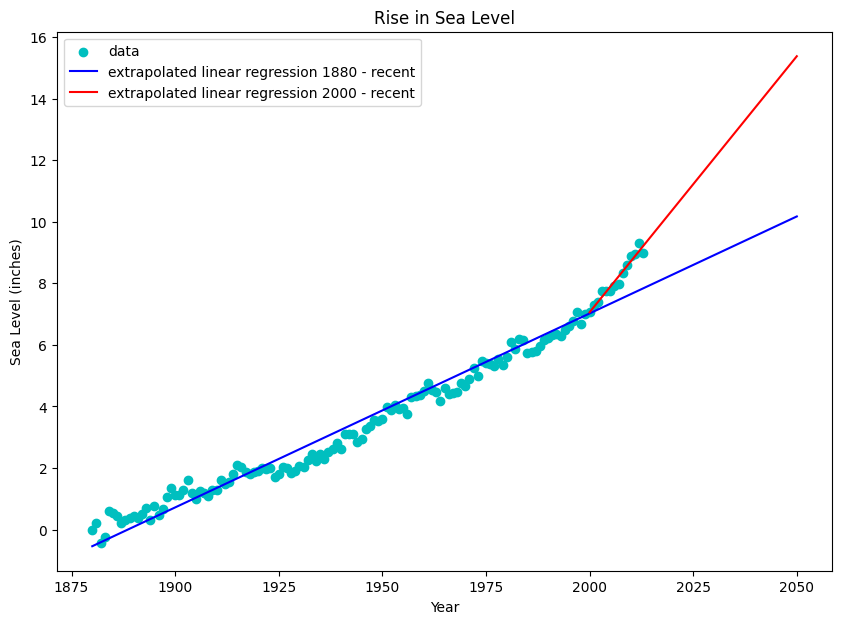

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x, y, color='c', label='data')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# plt.plot(2050, predicted_value, 'bo', label='predicted sea level in 2050 (from 1880)')
plt.plot(new_x_extrapolated, res.intercept + res.slope*new_x_extrapolated, color='b', label=f'extrapolated linear regression 1880 - recent')

# plt.plot(2050, predicted_value_2, 'ro', label='predicted sea level in 2050 (from 2000)')
plt.plot(new_x2_extrapolated, res2.intercept + res2.slope*new_x2_extrapolated, color='r', label=f'extrapolated linear regression 2000 - recent')

plt.legend()

In [58]:
line = ax.get_lines()[1].get_ydata().tolist()
line

[7.06107985777146,
 7.227507131103323,
 7.393934404435186,
 7.560361677767105,
 7.726788951098968,
 7.89321622443083,
 8.059643497762693,
 8.226070771094555,
 8.392498044426418,
 8.55892531775828,
 8.725352591090143,
 8.891779864422006,
 9.058207137753868,
 9.224634411085788,
 9.39106168441765,
 9.557488957749513,
 9.723916231081375,
 9.890343504413238,
 10.0567707777451,
 10.223198051076963,
 10.389625324408826,
 10.556052597740688,
 10.72247987107255,
 10.88890714440447,
 11.055334417736333,
 11.221761691068195,
 11.388188964400058,
 11.55461623773192,
 11.721043511063783,
 11.887470784395646,
 12.053898057727508,
 12.220325331059371,
 12.386752604391233,
 12.553179877723153,
 12.719607151055015,
 12.886034424386878,
 13.05246169771874,
 13.218888971050603,
 13.385316244382466,
 13.551743517714328,
 13.718170791046191,
 13.884598064378054,
 14.051025337709916,
 14.217452611041836,
 14.383879884373698,
 14.55030715770556,
 14.716734431037423,
 14.883161704369286,
 15.049588977701148,


In [59]:
fig.savefig('plot.png')